In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel('eucalyptus.xlsx')

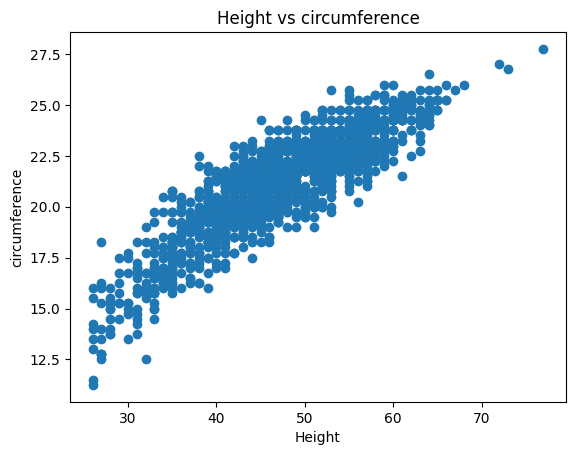

In [4]:
# Create scatter plots for each pair of variables

plt.scatter( data['circ'],data['ht'],label='Height vs circumference')
plt.title('Height vs circumference')
plt.xlabel('Height')
plt.ylabel('circumference')
plt.show()


Intercept: 9.037475668452768
Slope: 0.25713785500710895


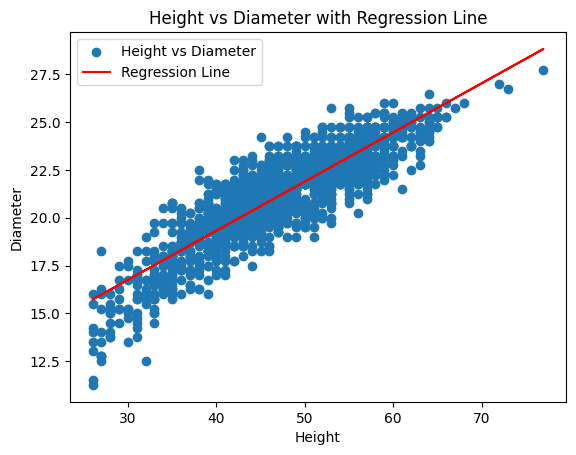

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = data[['circ']]
y = data['ht']
model.fit(X, y)
# Print the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])
# Predict the values
y_pred = model.predict(X)
# Plot the regression line
plt.scatter(data['circ'], data['ht'], label='Height vs Diameter')
plt.plot(data['circ'], y_pred, color='red', label='Regression Line')
plt.title('Height vs Diameter with Regression Line')
plt.xlabel('Height')
plt.ylabel('Diameter')
plt.legend()
plt.show()



In [6]:
import math
# Compute the std of the error of the regression

error = y - y_pred
sum_error = np.dot(error, error)
print('Sum of squared errors:', sum_error)

n = len(y_pred)
std = math.sqrt( 1/(n-2) * sum_error)
print('Standard deviation of the error:', std)

Sum of squared errors: 2052.083972018035
Standard deviation of the error: 1.1991833158863723


Intercept: -24.352003274243252
Slope: -0.4829454749340507


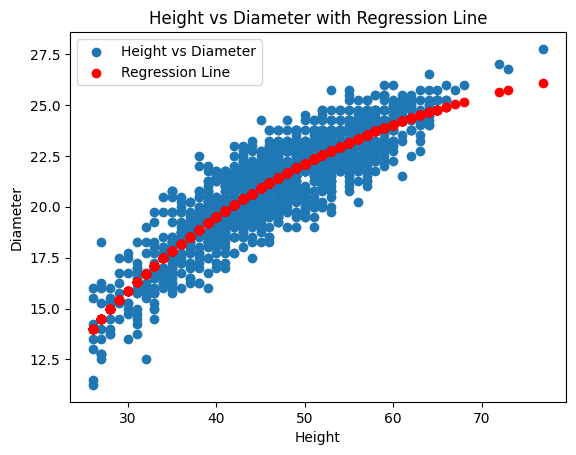

Sum of squared errors: 1840.6561307215404
Standard deviation of the error: 1.1357280297141144


In [7]:
model = LinearRegression()
X = np.array([data['circ'], np.sqrt(data['circ'])]).T

model.fit(X, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])
# Predict the values
y_pred = model.predict(X)
# Plot the regression line
plt.scatter(data['circ'], data['ht'], label='Height vs Diameter')
plt.scatter(data['circ'], y_pred, color='red', label='Regression Line')
plt.title('Height vs Diameter with Regression Line')
plt.xlabel('Height')
plt.ylabel('Diameter')
plt.legend()
plt.show()
# Compute the std of the error of the regression
error = y - y_pred
sum_error = np.dot(error, error)
print('Sum of squared errors:', sum_error)
n = len(y_pred)
std = math.sqrt( 1/(n-2) * sum_error)
print('Standard deviation of the error:', std)





Method 1 (Multiple Regression):
Residuals (first 5): 0    0.066712
1   -0.336719
2   -0.581101
3   -0.931220
4   -0.869746
Name: ht, dtype: float64
R²: 0.7921903882554493

Method 2 (Simple Regression):
Residuals (first 5): 0   -0.044438
1   -0.087266
2   -1.023025
3   -0.815852
4   -0.594403
Name: ht, dtype: float64
R²: 0.7683202384330652


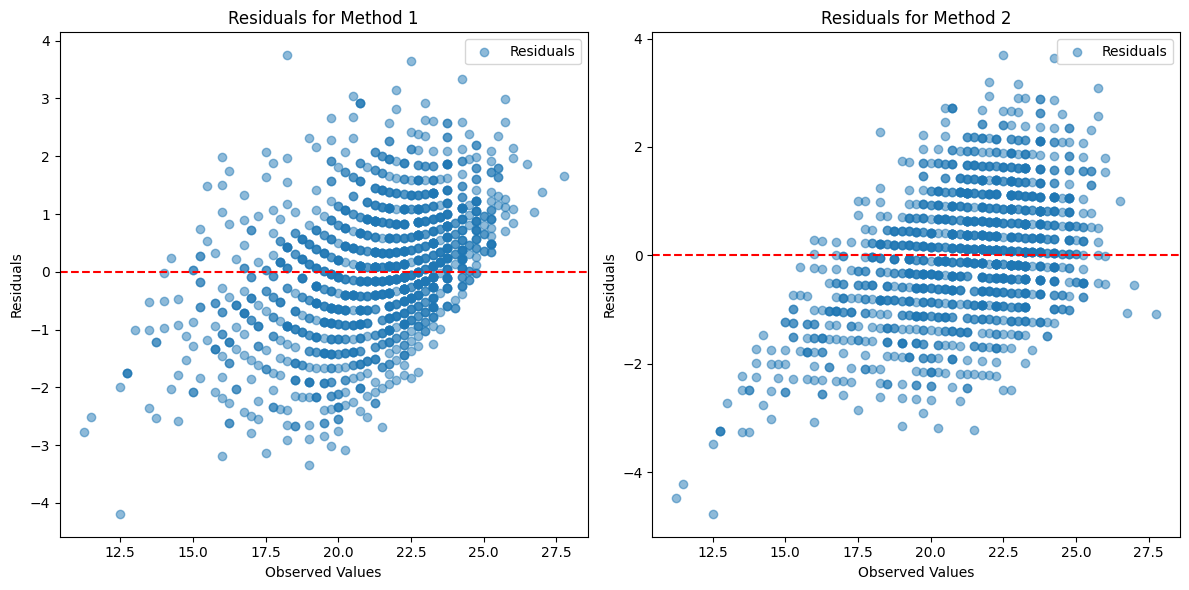

In [8]:
# Residuals for the current model
residuals_method_1 = y - y_pred

# R² coefficient of determination for the current model
r2_method_1 = model.score(X, y)

# Fit a simple linear regression model using only 'circ' as the predictor
model_simple = LinearRegression()
X_simple = data[['circ']]
model_simple.fit(X_simple, y)
y_pred_simple = model_simple.predict(X_simple)

# Residuals for the simple model
residuals_method_2 = y - y_pred_simple

# R² coefficient of determination for the simple model
r2_method_2 = model_simple.score(X_simple, y)

# Print the results
print("Method 1 (Multiple Regression):")
print("Residuals (first 5):", residuals_method_1.head())
print("R²:", r2_method_1)

print("\nMethod 2 (Simple Regression):")
print("Residuals (first 5):", residuals_method_2.head())
print("R²:", r2_method_2)

# Plot residuals for both methods
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y, residuals_method_1, alpha=0.5, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for Method 1')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y, residuals_method_2, alpha=0.5, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for Method 2')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

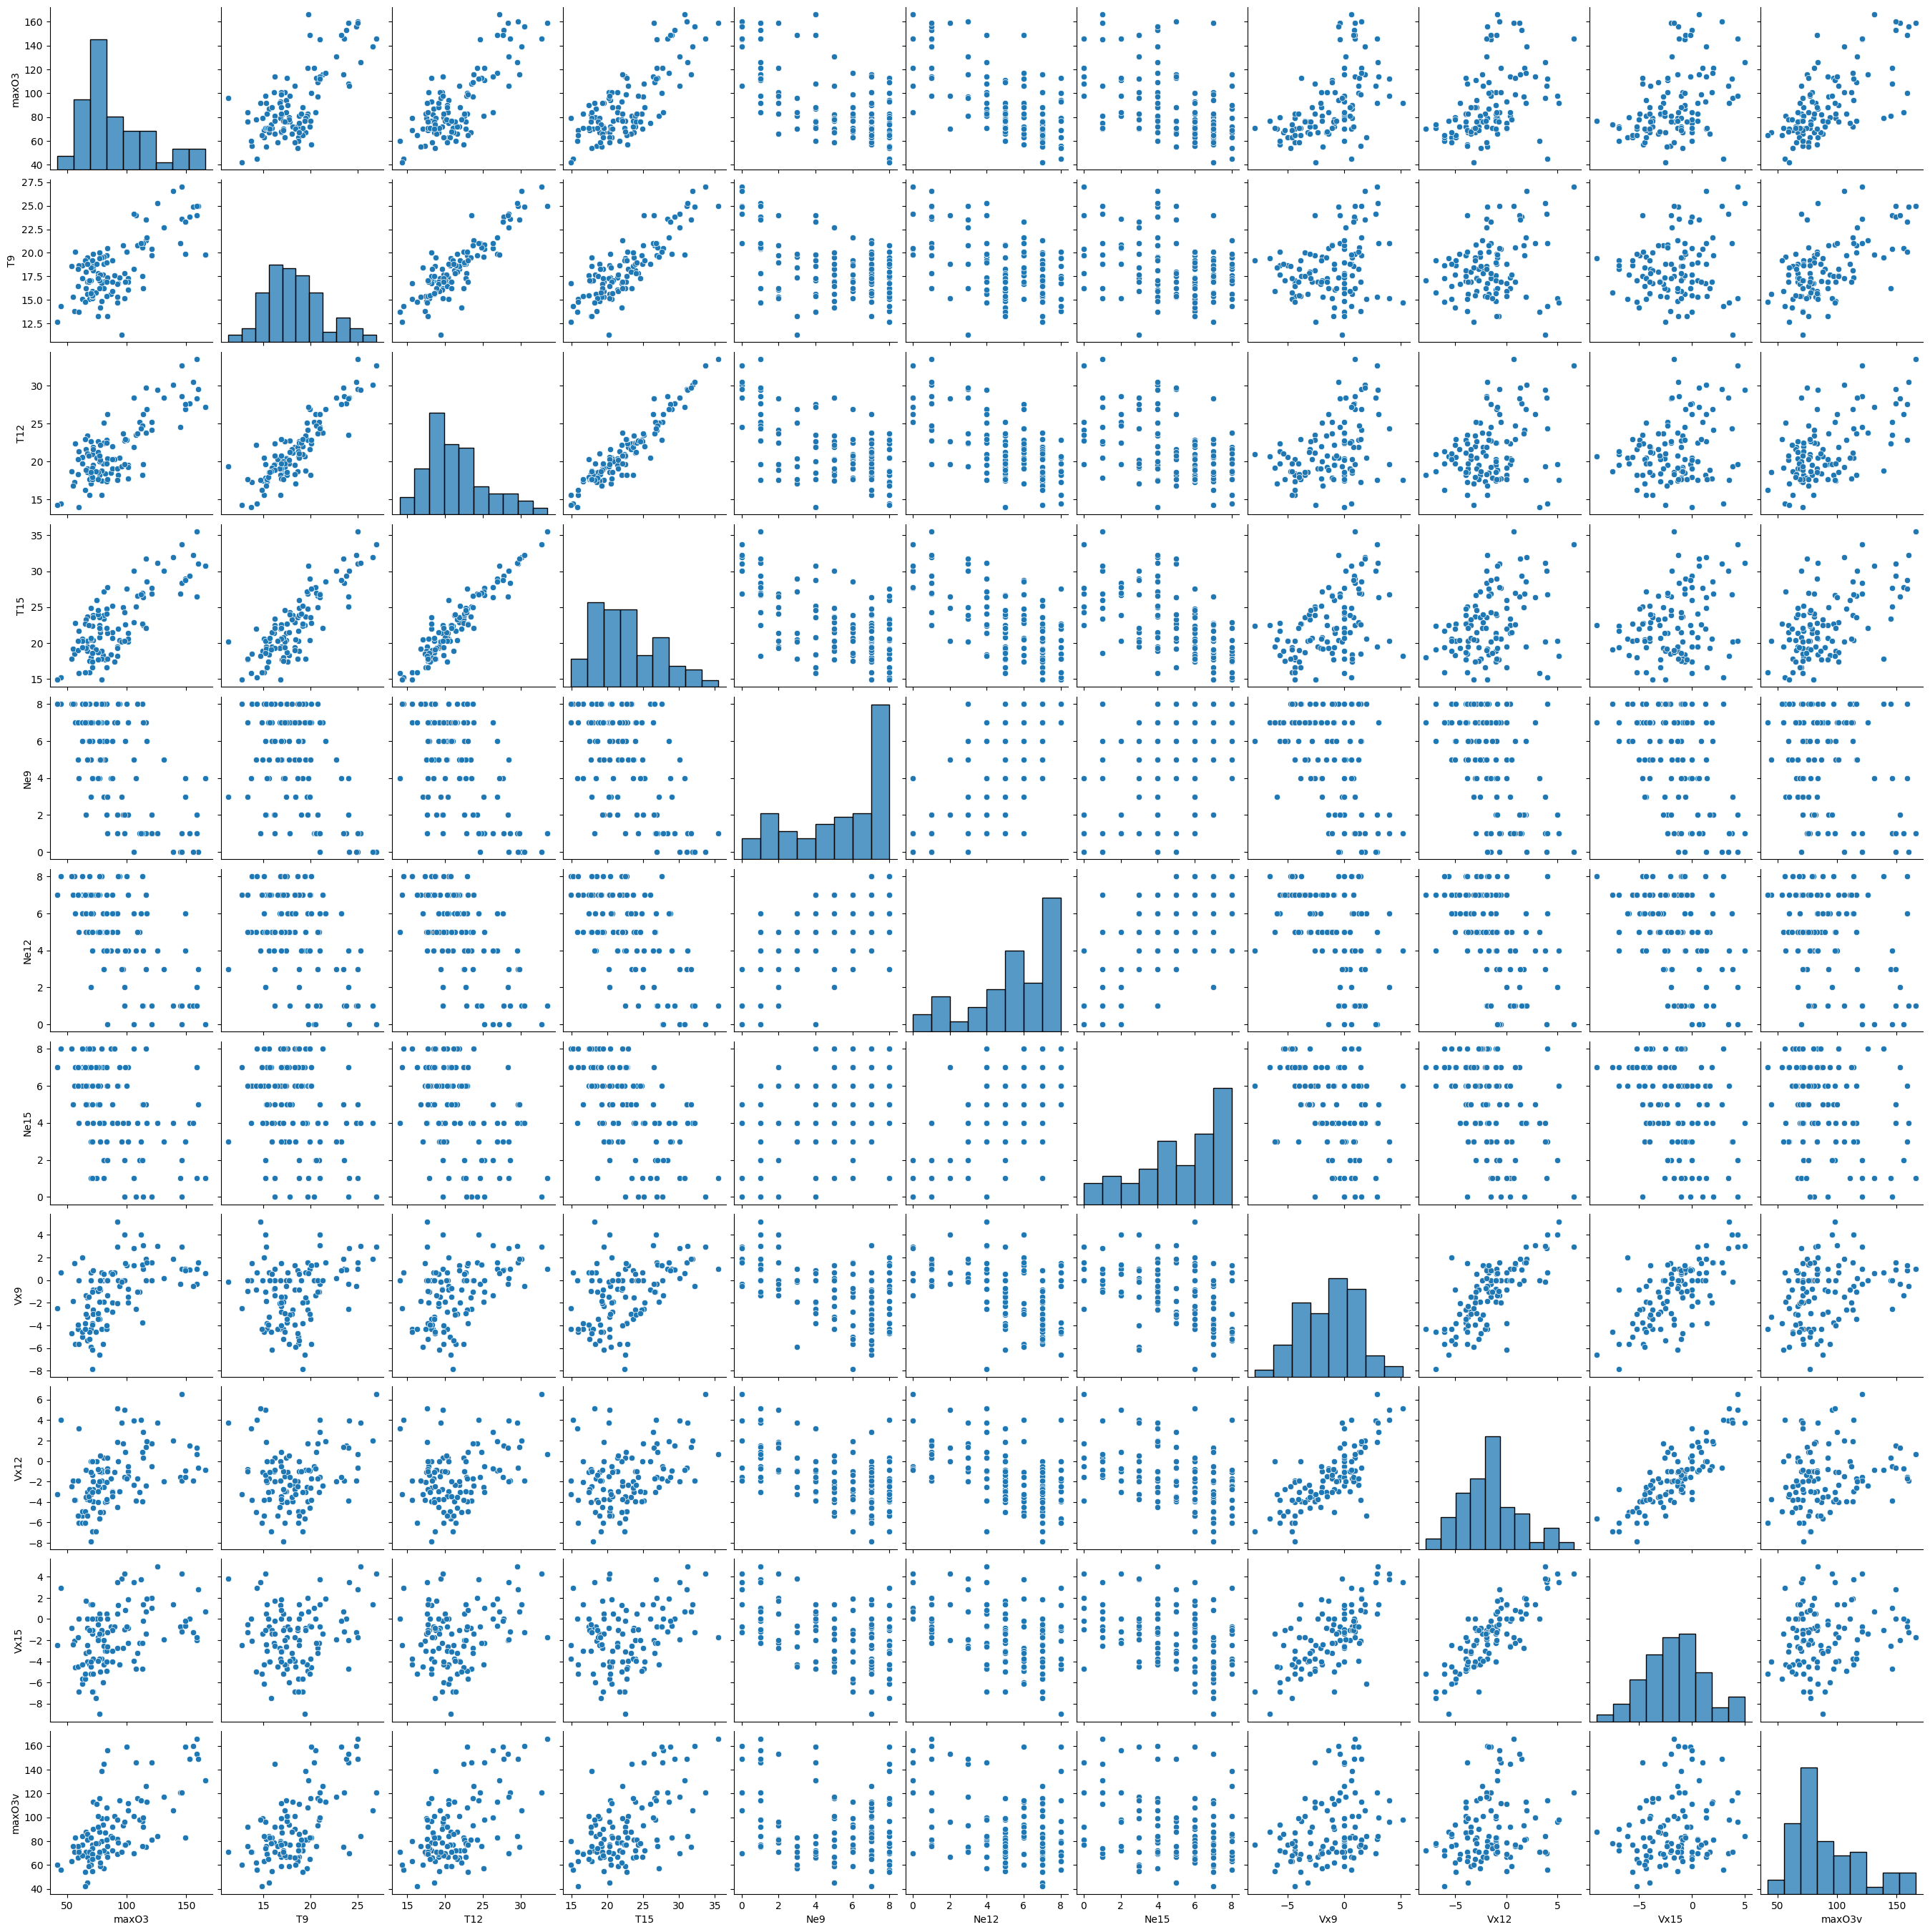

Correlation Coefficients:
           maxO3        T9       T12       T15       Ne9      Ne12      Ne15  \
maxO3   1.000000  0.699387  0.784262  0.774570 -0.621704 -0.640751 -0.478302   
T9      0.699387  1.000000  0.882967  0.846446 -0.483864 -0.472248 -0.325139   
T12     0.784262  0.882967  1.000000  0.946193 -0.584271 -0.660100 -0.458099   
T15     0.774570  0.846446  0.946193  1.000000 -0.586168 -0.649226 -0.574682   
Ne9    -0.621704 -0.483864 -0.584271 -0.586168  1.000000  0.788341  0.550249   
Ne12   -0.640751 -0.472248 -0.660100 -0.649226  0.788341  1.000000  0.709867   
Ne15   -0.478302 -0.325139 -0.458099 -0.574682  0.550249  0.709867  1.000000   
Vx9     0.527623  0.250690  0.430104  0.453089 -0.497636 -0.492658 -0.401472   
Vx12    0.430796  0.222386  0.312629  0.343751 -0.528775 -0.510320 -0.431863   
Vx15    0.391899  0.170322  0.270680  0.286603 -0.493901 -0.432269 -0.378290   
maxO3v  0.684516  0.582245  0.563629  0.567889 -0.276550 -0.361923 -0.308475   

             

In [9]:
ozone = pd.read_csv('ozone.csv')

# Select the first 11 numerical variables
numerical_vars = ozone.iloc[:, 1:12]

# Plot pairwise representation
sns.pairplot(numerical_vars)
plt.show()

# Print correlation coefficients
correlation_matrix = numerical_vars.corr()
print("Correlation Coefficients:")
print(correlation_matrix)


# Exercice 3 : Gradient descent

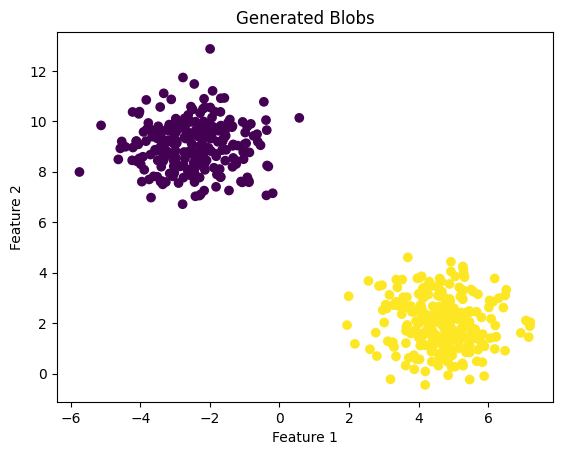

In [53]:
from sklearn import datasets
import random as rd

X,y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Generated Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



[0.28969828 3.88843499 3.88867326 ... 4.09740912 4.097588   4.09776683]


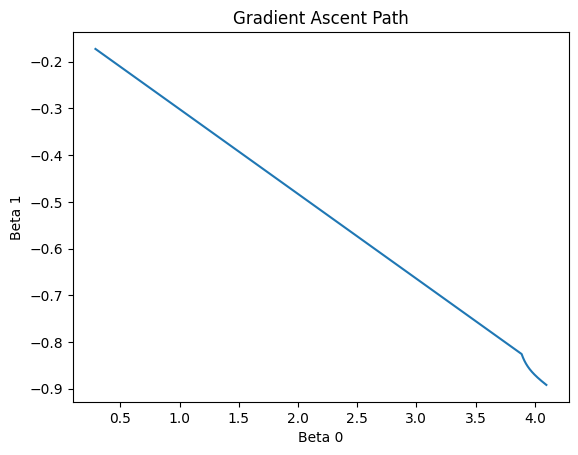

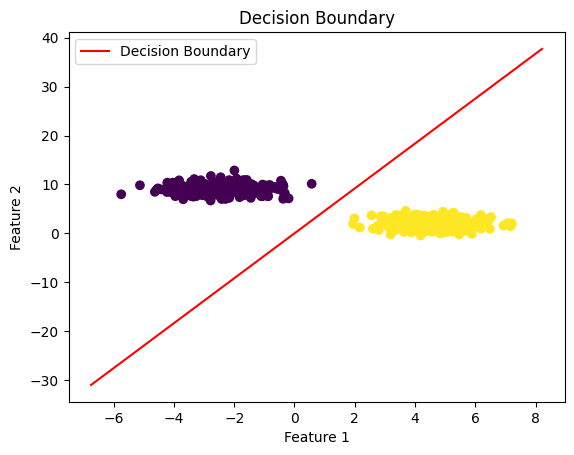

In [56]:

alpha = 0.01
beta = (rd.random() - 0.5, rd.random() - 0.5)
iter_max = 1000

def L(b,X,y):
    t=y*np.log(sigmoid(np.dot(X,b))) +(1-y)*np.log(1-sigmoid(np.dot(X,b)))
    return sum(t)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Gradient of log-likelihood
def grad(b, X, y):
    preds = sigmoid(np.dot(X, b))
    gradient = np.dot((y - preds), X)  # Vectorized gradient
    return gradient

# Gradient Ascent 
def gradient_ascent(X, y, alpha, beta, iter_max):
    B = [beta]
    for i in range(iter_max):
        B.append(B[-1] + alpha * grad(B[-1], X, y))
    return B


betas = gradient_ascent(X, y, alpha, beta, iter_max)

betas = np.array(betas)
print(betas[:,0])
plt.plot(betas[:,0],betas[:,1])
plt.title('Gradient Ascent Path')
plt.xlabel('Beta 0')
plt.ylabel('Beta 1')
plt.show()


# Calculer les points x,y pour la droite de décision
# L'équation de la droite est: β₀*x₁ + β₁*x₂ = 0
# Donc x₂ = -β₀/β₁ * x₁
x_line = np.array([x_min, x_max])
y_line = -(betas[-1][0] / betas[-1][1]) * x_line

# Tracer la droite
plt.plot(x_line, y_line, 'r-', label='Decision Boundary')
plt.legend()
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
